In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('17.csv')

In [3]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

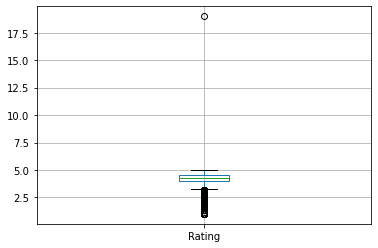

In [5]:
data.boxplot()

In [ ]:
data=pd.read_csv('17.csv')

In [6]:
data[data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
data.drop([10472],inplace=True)

In [8]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [9]:
def add_median(s):
    return s.fillna(s.median())
data.Rating=data['Rating'].transform(add_median)
data['Type'].fillna(str(data['Type'].mode().values[0]),inplace=True)
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]),inplace=True)
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]),inplace=True)

In [10]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
data['Price']=data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
data['Price']=data['Price'].apply(lambda x: float(x))
data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')
data['Installs']=data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
data['Installs']=data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
data['Installs']=data['Installs'].apply(lambda x: float(x))

In [12]:
data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [13]:
grp=data.groupby('Category')
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.mean)
z=grp['Reviews'].agg(np.mean)
i=grp['Installs'].agg(np.mean)

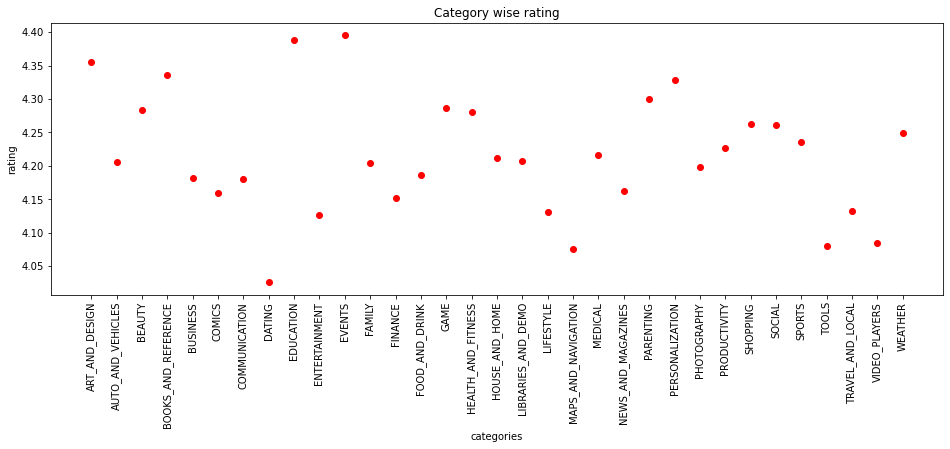

In [14]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro')
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('categories')
plt.ylabel('rating')
plt.show()

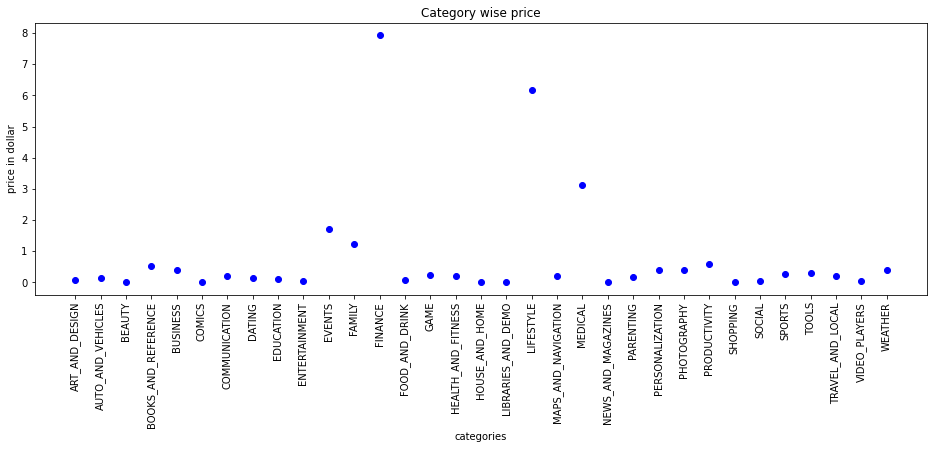

In [15]:
plt.figure(figsize=(16,5))
plt.plot(y,'ro',color='b')
plt.xticks(rotation=90)
plt.title('Category wise price')
plt.xlabel('categories')
plt.ylabel('price in dollar')
plt.show()

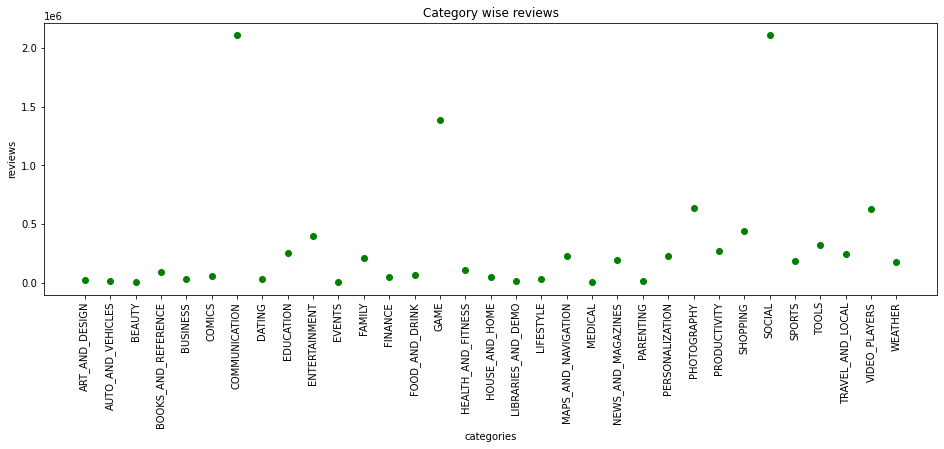

In [16]:
plt.figure(figsize=(16,5))
plt.plot(z,'ro',color='g')
plt.xticks(rotation=90)
plt.title('Category wise reviews')
plt.xlabel('categories')
plt.ylabel('reviews')
plt.show()

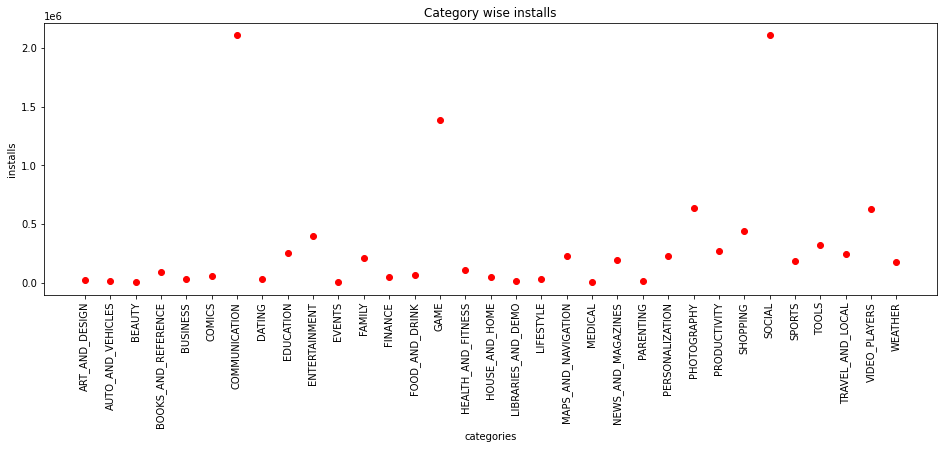

In [17]:
plt.figure(figsize=(16,5))
plt.plot(z,'ro')
plt.xticks(rotation=90)
plt.title('Category wise installs')
plt.xlabel('categories')
plt.ylabel('installs')
plt.show()

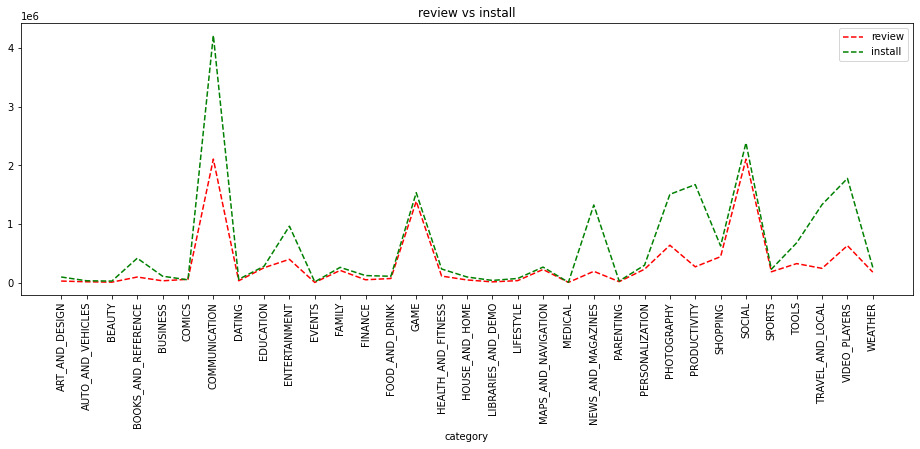

In [18]:
plt.figure(figsize=(16,5))
plt.plot(z,'r--')
plt.plot(i/20,'r--',color='g')
plt.xticks(rotation=90)
plt.title('review vs install')
plt.xlabel('category')
plt.legend(['review','install'])
plt.show()

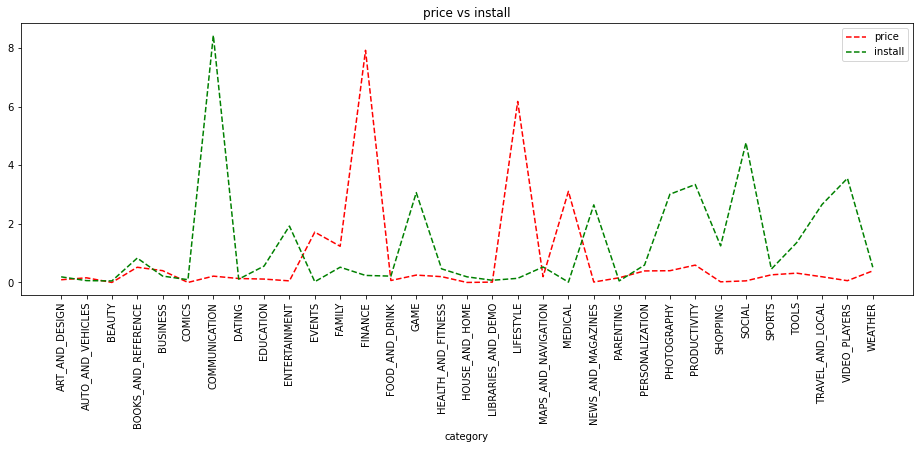

In [19]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--')
plt.plot(i/(10**7),'r--',color='g')
plt.xticks(rotation=90)
plt.title('price vs install')
plt.xlabel('category')
plt.legend(['price','install'])
plt.show()

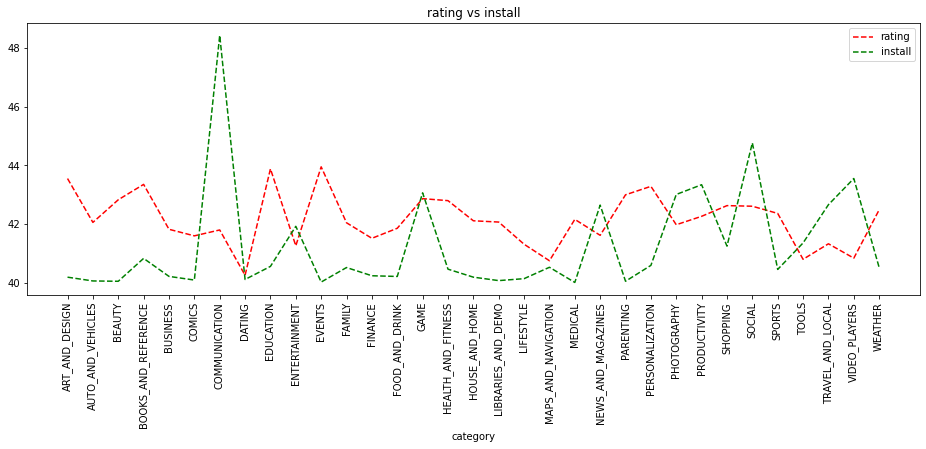

In [20]:
plt.figure(figsize=(16,5))
plt.plot(x*10,'r--')
plt.plot(i/(10**7)+40,'r--',color='g')
plt.xticks(rotation=90)
plt.title('rating vs install')
plt.xlabel('category')
plt.legend(['rating','install'])
plt.show()

NameError: name 'data' is not defined